0.9999999999999997 -0.9499999999999992


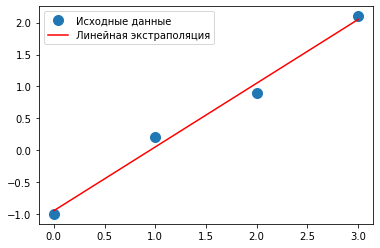

In [4]:
#Пример 1.1.1
#Проведем прямую 𝑦 = 𝑚x + 𝑏 через экспериментальные точки.
import numpy as np 
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

#перепишем уравнение y = mx + c как y=Ap, где A = [[x 1]] and p = [[m],[c]]
#построим А по х 

A = np.vstack([x,np.ones(len(x))]).T
A

#используем метод lstsq для решения его относительно вектора p
m,c = np.linalg.lstsq(A,y, rcond = None)[0]
print(m,c)

#построим график
import matplotlib.pyplot as plt
plt.plot(x,y,'o', label='Исходные данные',markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()


[-5.26589636 -4.35984306 -2.96843606 -1.8258585  -1.15922941  0.0461721
  1.29936277  2.3973459   3.31210155  4.00293267  5.40359632]
[24.90887429 16.03395049  8.94565447  4.43320004  0.6846793  -0.28691685
  0.83416352  3.56569814  9.46986162 15.64887743 24.8201519 ]


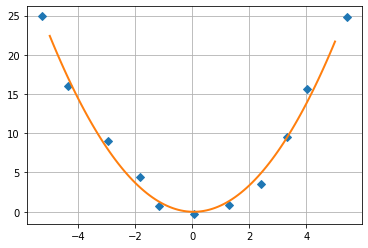

In [6]:
#Пример 1.1.2
#Пусть 𝑥𝑥, 𝑦𝑦 – вектора длиной 𝑛𝑛 > 3 (точек > 3). Задача заключается в
#построении эстраполяционного полинома второго порядка (параболы). Таким
#образом, необходимо найти такие коэффициенты поринома 𝑎𝑎, 𝑏𝑏, 𝑐𝑐 по методу
#наименьших квадратов. Данные могут быть получены в результате
#измерений. Покажем пример генерации данных случайным образом и
#загрузки их из файла.

from numpy import *
from numpy.random import *
#генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл 
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

#читаем данные из файла
x = fromfile('x_data.txt',float,sep='\n')
y = fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

#нахождение к-ф ф-ии вида y = ax**2 + bx + c методом ним-их квадратов
#задаём вектор m = [x**2,x,E]
m = vstack((x**2,x,ones(11))).T
#находин к-ты при составляющих вектора  m 
s = np.linalg.lstsq(m,y,rcond=None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5,5,101)
#рисуем точки 
plt.plot(x,y,'D')
#рисуем кривую вида y = ax**2 + bx + c, подлставляя к-ты s[0],s[1],s[2]
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

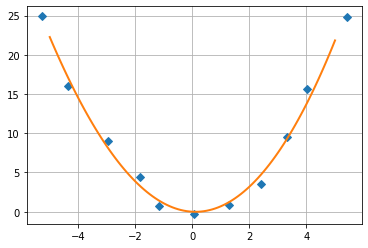

In [7]:
#Пример 1.1.3
#По данным предыдущего примера постройте эстраполяционного полинома
#третьего порядка
#найдём к-ты ф-ии вида y = ax**3 + bx**2 + cx +d
# задаём вектор m = [x**3,x,E]
m = vstack((x**3,x**2,x,ones(11))).T
#находиим к-ты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond=None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5,5,101)
#рисуем точки 
plt.plot(x,y,'D')
#рисуем кривую вида y = ax**3 + bx**2 + cx + d, подлставляя к-ты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=2)
plt.grid()
plt.savefig('полином 3-й степени.png')

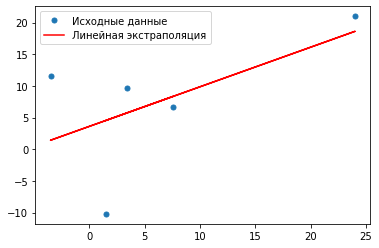

In [16]:
#Задание1 полином 1-ого порядка 

import numpy as np 
x = np.array([1.5,3.4,24,-3.5,7.6])
y = np.array([-10.2,9.6,21,11.6,6.7])
A = np.vstack([x,np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y, rcond = None)[0]
import matplotlib.pyplot as plt
plt.plot(x,y,'o', label='Исходные данные',markersize=5)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()


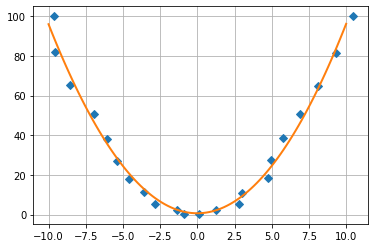

In [20]:
#Задание1 полином 2-ого порядка 
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-10,10,22)
y = x**2+delta*(rand(22)-0.5)
x += delta*(rand(22)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')


x = fromfile('x_data.txt',float,sep='\n')
y = fromfile('y_data.txt',float,sep='\n')


m = vstack((x**2,x,ones(22))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]


x_prec = linspace(-10,10,101)
#рисуем точки 
plt.plot(x,y,'D')
#рисуем кривую вида y = ax**2 + bx + c, подлставляя к-ты s[0],s[1],s[2]
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

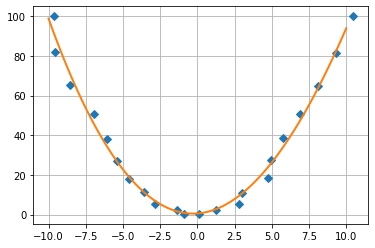

In [22]:
#Задание1 полином 3-ого порядка

m = vstack((x**3,x**2,x,ones(22))).T
#находиим к-ты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond=None)[0]

#на отрезке [-10,10]
x_prec = linspace(-10,10,101)
#рисуем точки 
plt.plot(x,y,'D')
#рисуем кривую вида y = ax**3 + bx**2 + cx + d, подлставляя к-ты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=2)
plt.grid()
plt.savefig('полином 3-й степени.png')

0.0001584750253974564
0.08218808291339551


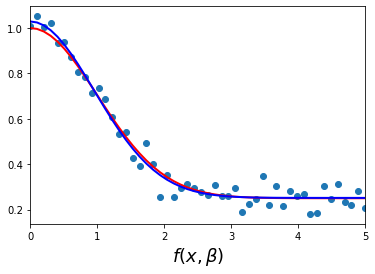

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.00913636 1.05189402 1.00591094 1.02309717 0.93359541 0.9370631
 0.87450709 0.80651824 0.78198673 0.71464079 0.73525471 0.68522454
 0.60818588 0.53301749 0.54175672 0.42632299 0.39211134 0.49351287
 0.39906378 0.25526987 0.35310385 0.25377364 0.29298294 0.31105111
 0.29660486 0.27927306 0.26457968 0.30685693 0.25858865 0.26145642
 0.29646302 0.18823293 0.22433399 0.24506548 0.34769985 0.21947095
 0.30221848 0.21429625 0.2838167  0.260

In [29]:
#Пример 1.1.4
#Необходимо проверить гипотезу, что наши точечно заданная функция ложится
#на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒xp(−𝑏2𝑥2)
#добавим шумав данные, сделанные по функции 𝑓(𝑥, 𝑏) с к-ми b = (0.25,0.75,0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2*x**2)
#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))

#используем функцию для получения решения в виде коэффициентов ф-ии f(x) для указанных xdata ydata

import scipy as sp
from scipy import optimize
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

#вфчислим линейноеотклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)

In [ ]:
#Пример 1.1.5
#Необходимо проверить гипотезу, что наши точечно заданная функция ложится
#на кривые вида:
#1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
#2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
#3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙n(𝑥)
#4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1


[0.27408367 0.74434353]
0.00013020099819943868
0.11448708459995213


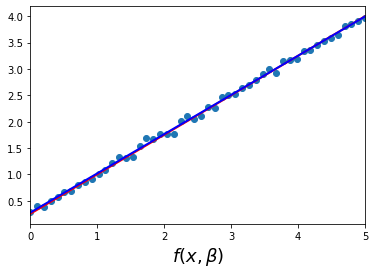

In [30]:
#решение 1 
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (0.25,0.75)
beta = (0.25,0.75)
def f(x,b0,b1):
    return b0 + b1*x
#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[0.23001806 0.73305784 0.50554027]
0.00013349671328597383
0.11132228176635538


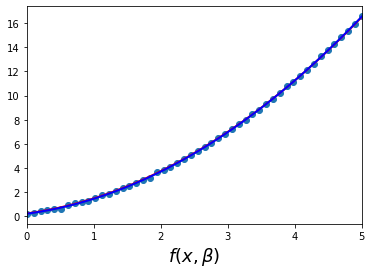

In [31]:
#решение 2
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (0.25,0.75,0.5)
beta = (0.25,0.75,0.5)
def f(x, b0, b1, b2):
    return b0 + b1*x + b2*x*x

#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[0.9856541  1.99839136]
3.3236778759375716e-05
0.07685810219003351


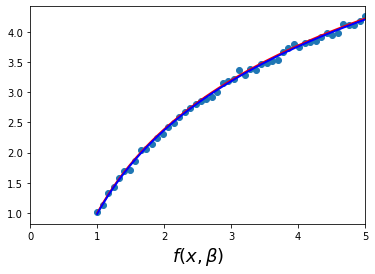

In [32]:
#решение 3
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (1,2)
beta = (1,2)
def f(x, b0, b1):
    return b0 + b1*np.log(x)

#зададим массив точек xi
xdata = np.linspace(1,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[1.00129829 2.00001323]
0.00015911703241992017
0.177461286185187


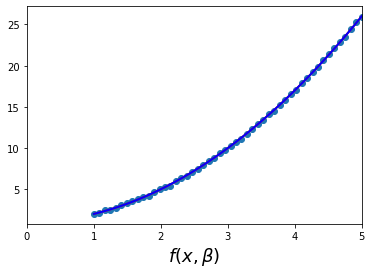

In [33]:
#решение 4
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (1,2)
beta = (1,2)
def f(x, b0, b1):
    return b0 + x**b1
#зададим массив точек xi
xdata = np.linspace(1,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[1.25949169 1.74802694]
0.00014109985444529674
0.12407056448074075


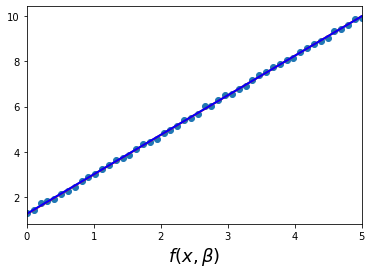

In [34]:
# Задание 2.1
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (1.25,1.75)
beta = (1.25,1.75)
def f(x,b0,b1):
    return b0 + b1*x
#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[-25.00055073  75.00467018 -50.00096418]
0.00014557633502385232
0.12139542812125052


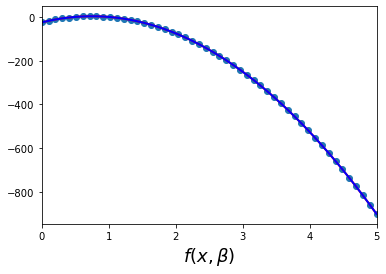

In [42]:
# Задание 2.2
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (-25,-75,-50)
beta = (-25,75,-50)
def f(x, b0, b1, b2):
    return b0 + b1*x + b2*x*x

#зададим массив точек xi
xdata = np.linspace(0,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[999.98856642   2.00980486]
3.904801823783116e-05
0.09029620897616586


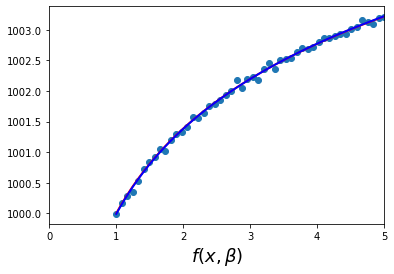

In [46]:
# Задание 2.3
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (10,20)
beta = (1000,2)
def f(x, b0, b1):
    return b0 + b1*np.log(x)

#зададим массив точек xi
xdata = np.linspace(1,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

[0.9933524  2.00048583]
7.106014660949967e-05
0.07925917161152397


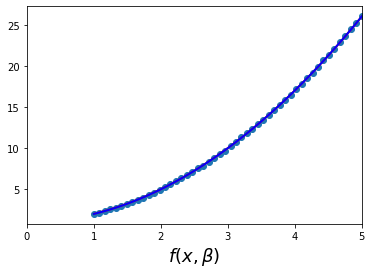

In [54]:
# Задание 2.4
# Добваим шума в данные, сделанные по ф-ии f(x,b) с к-ми b = (1,2)
beta = (1,2)
def f(x, b0, b1):
    return b0 + x**b1
#зададим массив точек xi
xdata = np.linspace(1,5,50)
#создаём теоретичнески привльные значения точек yi(без шума)
y = f(xdata, *beta)
#зашумялем эти данные 
ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

#вычислим лин отклон 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_xlabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

(21, 2)


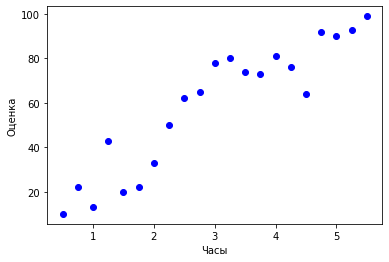

In [64]:
#Пример 1.2.1
#Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студента и его успеваемости 
my_dict = {'Учебное время':[0.50,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5],
           'Оценка':[10,22,13,43,20,22,33,50,62,65,78,80,74,73,81,76,64,92,90,93,99]}

dataset = pd.DataFrame(my_dict)
dataset.head()

#Исследуем набор данных 
print(dataset.shape)
dataset.describe()

#нарисуем точечную диаграмму 
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [ ]:
#Пример 1.2.1
#Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
#создадим набор данных для описания взаимосвязи между временем обучения студента и его успеваемости 
my_dict = {'Учебное время':[0.50,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5],
           'Оценка':[10,22,13,43,20,22,33,50,62,65,78,80,74,73,81,76,64,92,90,93,99]}

dataset = pd.DataFrame(my_dict)
dataset.head()


,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [66]:
#Исследуем набор данных 
print(dataset.shape)
dataset.describe()

(21, 2)


,Учебное время,Оценка
count,21.000000,21.000000
mean,3.000000,59.047619
std,1.551209,28.862564
min,0.500000,10.000000
25%,1.750000,33.000000
50%,3.000000,65.000000
75%,4.250000,80.000000
max,5.500000,99.000000


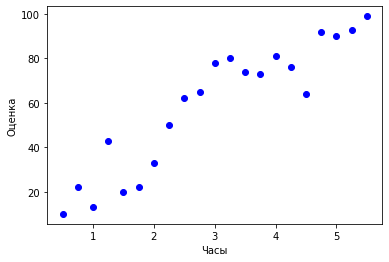

In [67]:
#нарисуем точечную диаграмму 
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [68]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)


[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 65 78 80 74 73 81 76 64 92 90 93 99]


In [76]:
#Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовыый наборы
#Приведённый фрагмент разделяет 80% данных на обучающий набор, а 20% на набор тестов
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [73]:
#далее можно обучить алгоритм линейной регрессиии
#необходимо импортировать LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [75]:
#приведёи получившиеся к-ты для лин рег 
print(regressor.intercept_)
print(regressor.coef_)

4.5872048743335725
[17.57893592]


In [77]:
y_pred = regressor.predict(X_test)
#Сравним фактические значения с прогнозиируемыми 
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


,Actual,Predicted
0,62,48.534545
1,73,70.508215
2,99,101.271352
3,22,17.771407
4,80,61.718747


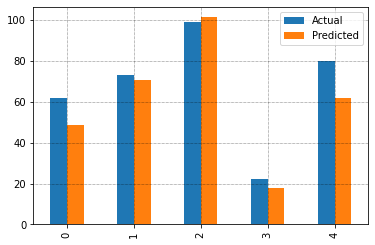

In [79]:
#визуализируем результат сравнения в виде гистограммы 
df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major', linestyle=':',linewidth='0.5',color='black')
plt.show()

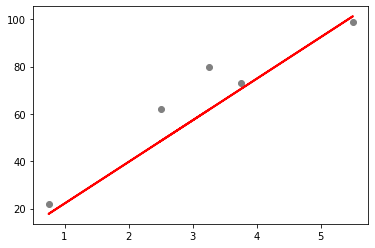

In [80]:
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [81]:
url='https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset=pd.read_csv(url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [82]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


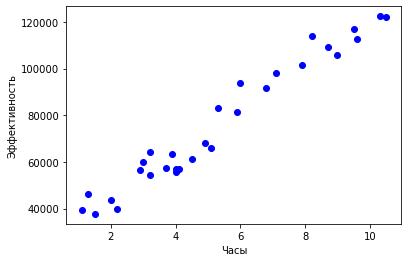

In [83]:
#нарисуем точечную диаграмму 
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Эффективность")
plt.show()

In [84]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [85]:
#Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовыый наборы
#Приведённый фрагмент разделяет 80% данных на обучающий набор, а 20% на набор тестов
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [86]:
#далее можно обучить алгоритм линейной регрессиии
#необходимо импортировать LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [87]:
#приведёи получившиеся к-ты для лин рег 
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [88]:
y_pred = regressor.predict(X_test)
#Сравним фактические значения с прогнозиируемыми 
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


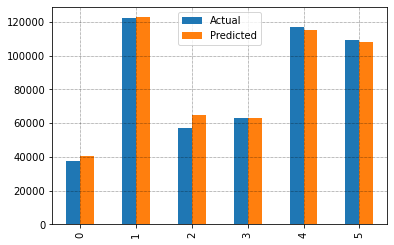

In [89]:
#визуализируем результат сравнения в виде гистограммы 
df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major', linestyle=':',linewidth='0.5',color='black')
plt.show()

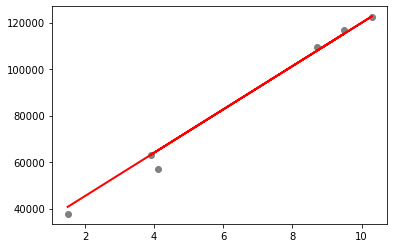

In [90]:
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [93]:
#Пример 1.3.1
import numpy as np 
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,5,6,7,2,4,1,2,3,3,3,2,6,8,0,1,3,7,9,3,5,9,8],
     [4,5,7,5,6,1,3,7,9,0,7,6,4,1,0,5,2,8,0,9,4,5,7]]
X = np.transpose(X)
X = np.c_[X,np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.21074377 -0.12816015 -0.26338278  4.20338624]


In [98]:
#Пример 1.3.2
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,5,6,7,2,4,1,2,3,3,3,2,6,8,0,1,3,7,9,3,5,9,8],
     [4,5,7,5,6,1,3,7,9,0,7,6,4,1,0,5,2,8,0,9,4,5,7]]

#формируем DataFrame из двух списков 
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2] 
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,5,5
2,3,4,6,7
3,4,1,7,5
4,3,5,2,6


In [99]:
#изучим данные 
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,4.391304,4.565217
std,1.674029,2.404706,2.675463,2.841672
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.500000,2.500000,2.500000
50%,4.000000,5.000000,4.000000,5.000000
75%,5.000000,6.500000,6.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [100]:
#разделим данные на метки и атрибуты
X = dataset[['x1','x2','x3']]
y = dataset['y']

In [101]:
#разделим данные 
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [102]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [103]:
#вывудум к-ты модели
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.244463
x2,-0.148677
x3,-0.357338


In [104]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df


,Actual,Predicted
11,5,3.902200
10,4,2.418331
21,3,2.729870
14,4,6.099122
20,1,3.926381


In [105]:
#оценка производительности алгоритма 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 3.3499663051476185


In [106]:
# Задание 3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

url='https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset=pd.read_csv(url)

dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [107]:
print(dataset.shape) 
dataset.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [108]:
X = dataset[['fixed acidity','volatile acidity', 'alcohol']]
y = dataset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
fixed acidity,0.035437
volatile acidity,-1.348150
alcohol,0.327003


In [109]:
y_pred = regressor.predict(X_test)
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataframe

,Actual,Predicted
1109,6,5.940980
1032,5,4.981045
1002,7,6.417707
487,6,5.422189
979,5,5.886753
...,...,...
794,6,6.741709
813,4,6.106830
1322,5,6.252199
704,4,5.123330


In [110]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.4096570425100589


In [111]:
# Задание co *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

#вариант 3
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

# Коэффициенты полиномов первого и второго порядка
# Зададим вектор m
m1 = np.vstack((x, np.ones(len(x)))).T
m2 = np.vstack((x**2, x, np.ones(len(x)))).T
# Находим коэффициенты при состовляющих вектора m
s1 = np.linalg.lstsq(m1, y, rcond = None)[0]
s2 = np.linalg.lstsq(m2, y, rcond = None)[0]

print('Коэффициенты полинома первой степени: ', s1)
print('Среднеквадратичное отклонение:', np.std(s1))
print('Коэффициенты полинома второй степени: ', s2)
print('Среднеквадратичное отклонение:', np.std(s2))

Коэффициенты полинома первой степени:  [ 1.         -0.66666667]
Среднеквадратичное отклонение: 0.8333333333333326
Коэффициенты полинома второй степени:  [ 0.44642857 -2.125       4.75      ]
Среднеквадратичное отклонение: 2.836245502200008


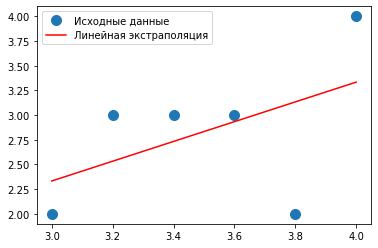

In [112]:
m, c = np.linalg.lstsq(m1, y, rcond = None)[0]
import matplotlib.pyplot as plt 
plt.plot(x, y, 'o', label='Исходные данные', markersize=10) 
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция') 
plt. legend()
plt. show()

In [113]:
m2, c2 = np.linalg.lstsq(m1, s1, rcond = None)[0]
import matplotlib.pyplot as plt 
plt.plot(x, y, 'o', label='Исходные данные', markersize=10) 
plt.plot(x, m2*x + c2, 'r', label='Решено') 
plt. legend()
plt. show()

LinAlgError: Incompatible dimensions

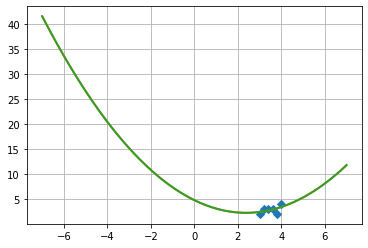

In [114]:
from numpy import *
from numpy.random import *
delta = 5.0
s = np.linalg.lstsq(m2, y, rcond = None)[0]
s2 = np.linalg.lstsq(m2, y, rcond = None)[0]
x_prec = linspace(-7, 7, 101)
plt.plot(x, y, 'D') 
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.plot(x_prec, s2[0] * x_prec**2 + s2[1] * x_prec+s2[2],'-', lw=2)
plt.grid()